<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/mlearn_ALIGNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%time
!pip install --pre dgl -f https://data.dgl.ai/wheels/cu118/repo.html
!pip install --pre dglgo -f https://data.dgl.ai/wheels-test/repo.html
!pip install alignn

Looking in links: https://data.dgl.ai/wheels/cu118/repo.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 MB 11.3 MB/s eta 0:00:00
Looking in links: https://data.dgl.ai/wheels-test/repo.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 95.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 5.6 MB/s eta 0:

CPU times: user 553 ms, sys: 102 ms, total: 655 ms
Wall time: 1min 19s


In [2]:
pip install -q pymatgen

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 52.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.3/154.3 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 102.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
alignn 2023.7.10 requires pydantic==1.8.1, but you have pydantic 1.10.11 which is incompatible.


In [3]:
import site
site.main()

from pymatgen.core import Structure, Lattice
import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm
import numpy as np
import json

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import functools
from matplotlib import cm
import os
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams['axes.axisbelow'] = True
mpl.rcParams['xtick.labelsize'] = 24
mpl.rcParams['ytick.labelsize'] = 24

In [5]:
!rm *.json

rm: cannot remove '*.json': No such file or directory


In [6]:
# get data from mlearn
#!rm *.json
!for m in Ni Cu Mo Ge Si Li; do wget https://github.com/materialsvirtuallab/mlearn/raw/master/data/${m}/test.json; mv test.json ${m}_test.json; done;
!ls

--2023-07-20 00:18:54--  https://github.com/materialsvirtuallab/mlearn/raw/master/data/Ni/test.json
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/materialsvirtuallab/mlearn/master/data/Ni/test.json [following]
--2023-07-20 00:18:54--  https://raw.githubusercontent.com/materialsvirtuallab/mlearn/master/data/Ni/test.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 611126 (597K) [text/plain]
Saving to: ‘test.json’

test.json           100%[===================>] 596.80K  --.-KB/s    in 0.005s  

2023-07-20 00:18:54 (128 MB/s) - ‘test.json’ saved [611126/611126]

--2023-07-20 00:18:55--  ht

In [ ]:
#pip install alignn

ASE Calculator wrapper for ALIGNN-FF

In [7]:
!ls

Cu_test.json  Li_test.json  Ni_test.json  Si_test.json
Ge_test.json  Mo_test.json  sample_data


#Trained on JARVIS-DFT data only (model: `fd_path`)

In [9]:
from alignn.ff.ff import AlignnAtomwiseCalculator,default_path,fd_path,alignnff_fmult,mlearn_path
model_path = fd_path() #default_path()
calc = AlignnAtomwiseCalculator(path=model_path)

dir_path /usr/local/lib/python3.10/dist-packages/alignn/ff/alignnff_fd


100%|██████████| 15.0M/15.0M [00:02<00:00, 5.93MiB/s]


model_path /usr/local/lib/python3.10/dist-packages/alignn/ff/alignnff_fd


In [10]:
from ase import Atoms
import numpy as np
import pymatgen.io.ase as aio
%matplotlib inline

100%|██████████| 31/31 [00:27<00:00,  1.12it/s]


Material: Ni, F-RMSE: 0.45357625514959027, F-MAE: 0.2444284469908966


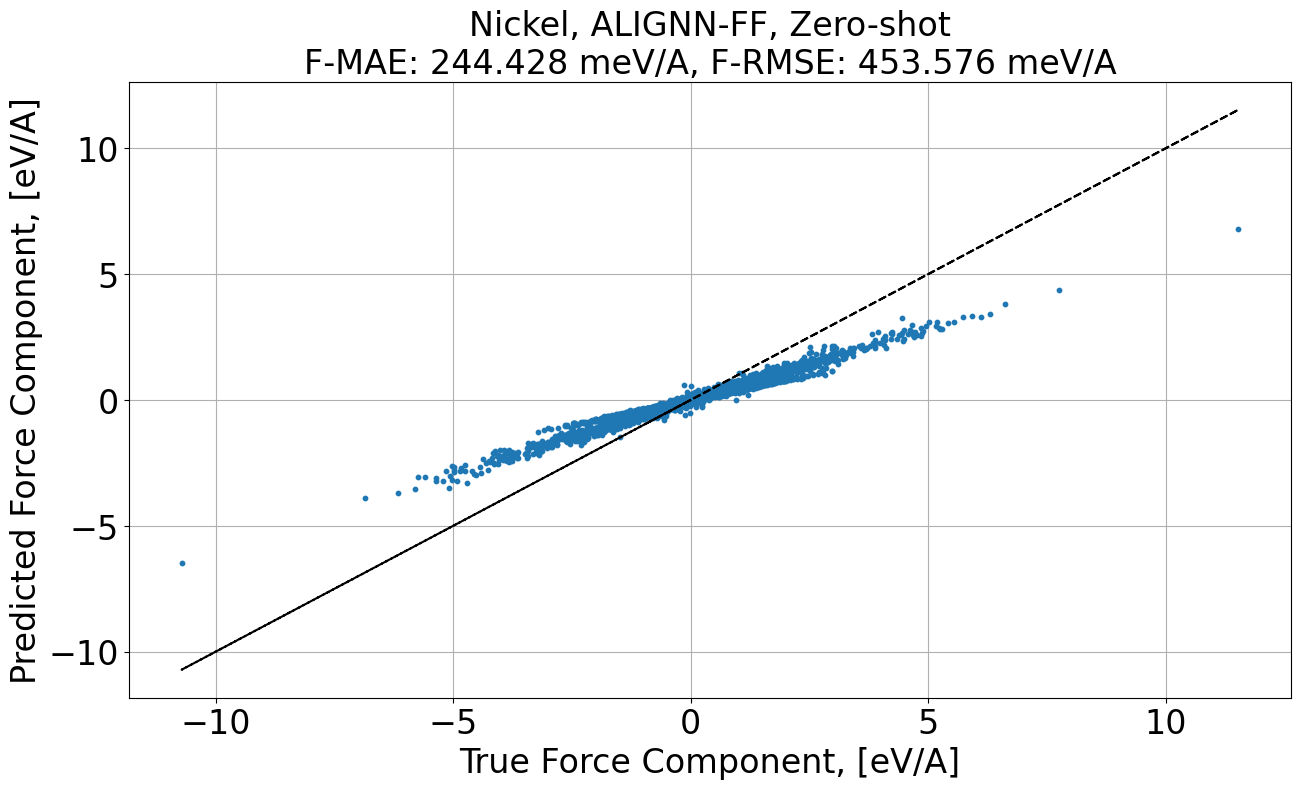

100%|██████████| 31/31 [00:18<00:00,  1.69it/s]


Material: Cu, F-RMSE: 0.14134492241397675, F-MAE: 0.07246266296848111


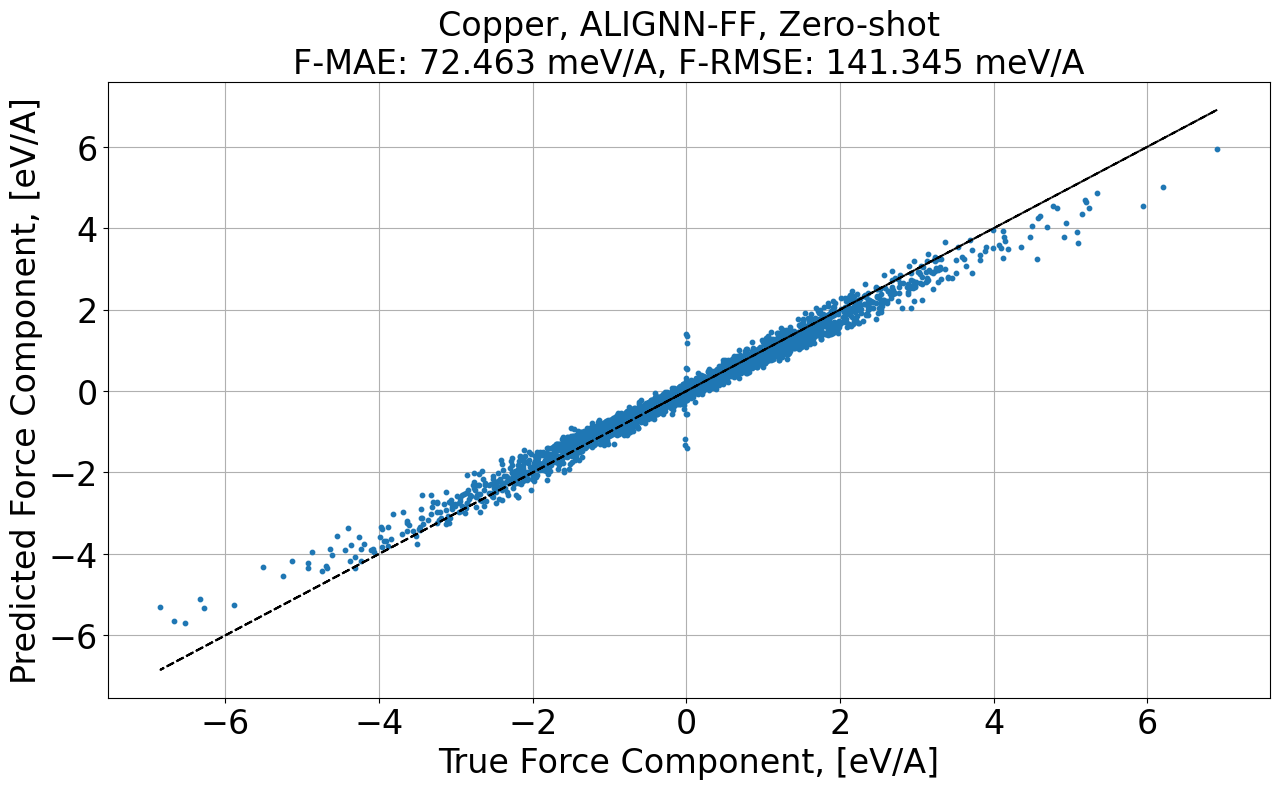

100%|██████████| 23/23 [00:06<00:00,  3.52it/s]


Material: Mo, F-RMSE: 0.8877399101331178, F-MAE: 0.5609259223209733


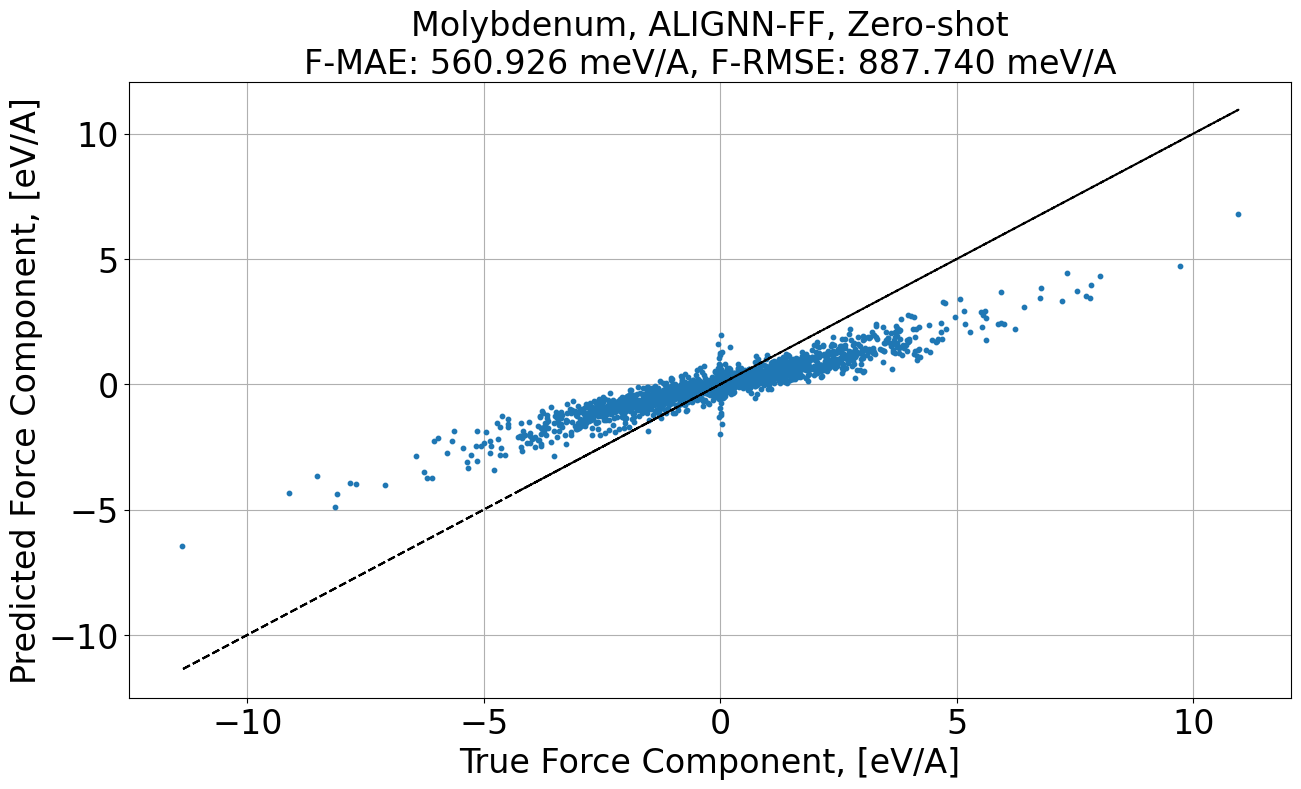

100%|██████████| 25/25 [00:09<00:00,  2.59it/s]


Material: Ge, F-RMSE: 0.44727329869616284, F-MAE: 0.2914562497633684


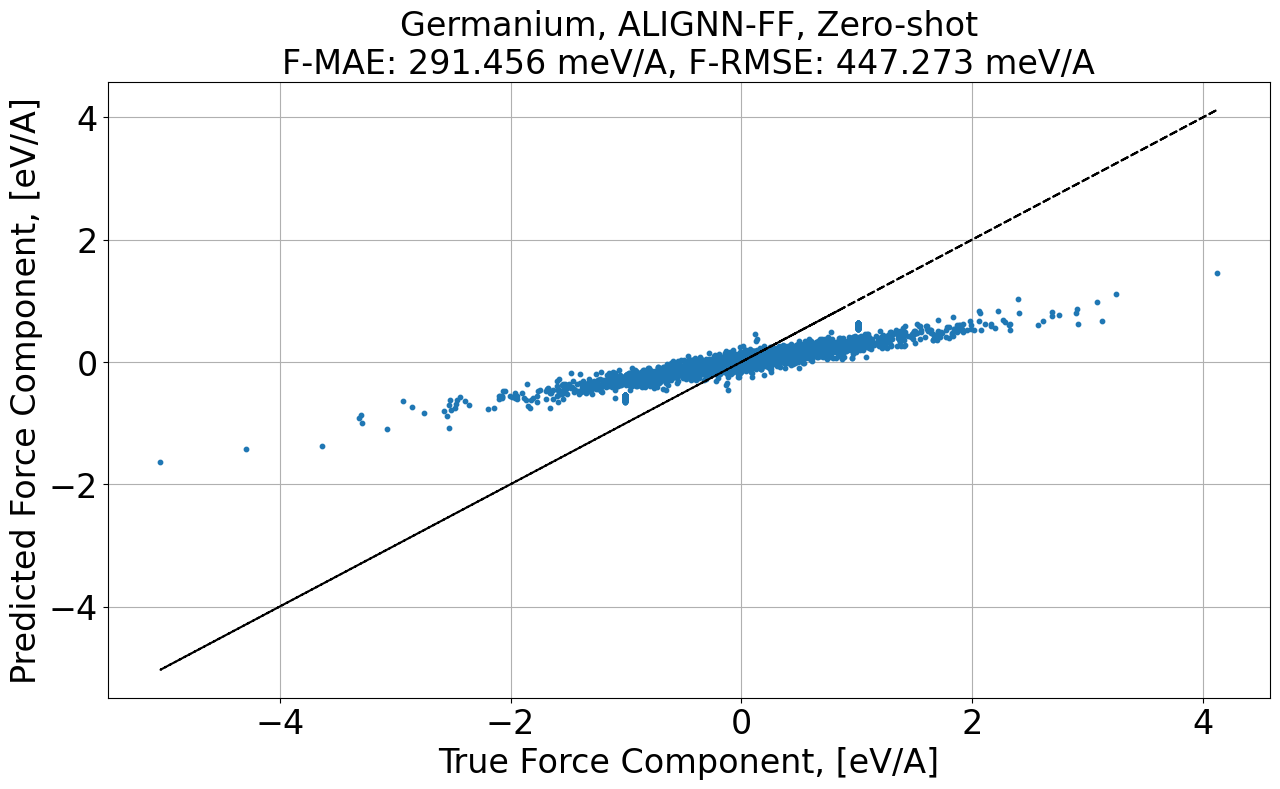

100%|██████████| 25/25 [00:07<00:00,  3.23it/s]


Material: Si, F-RMSE: 0.37453477673031293, F-MAE: 0.24373579027319808


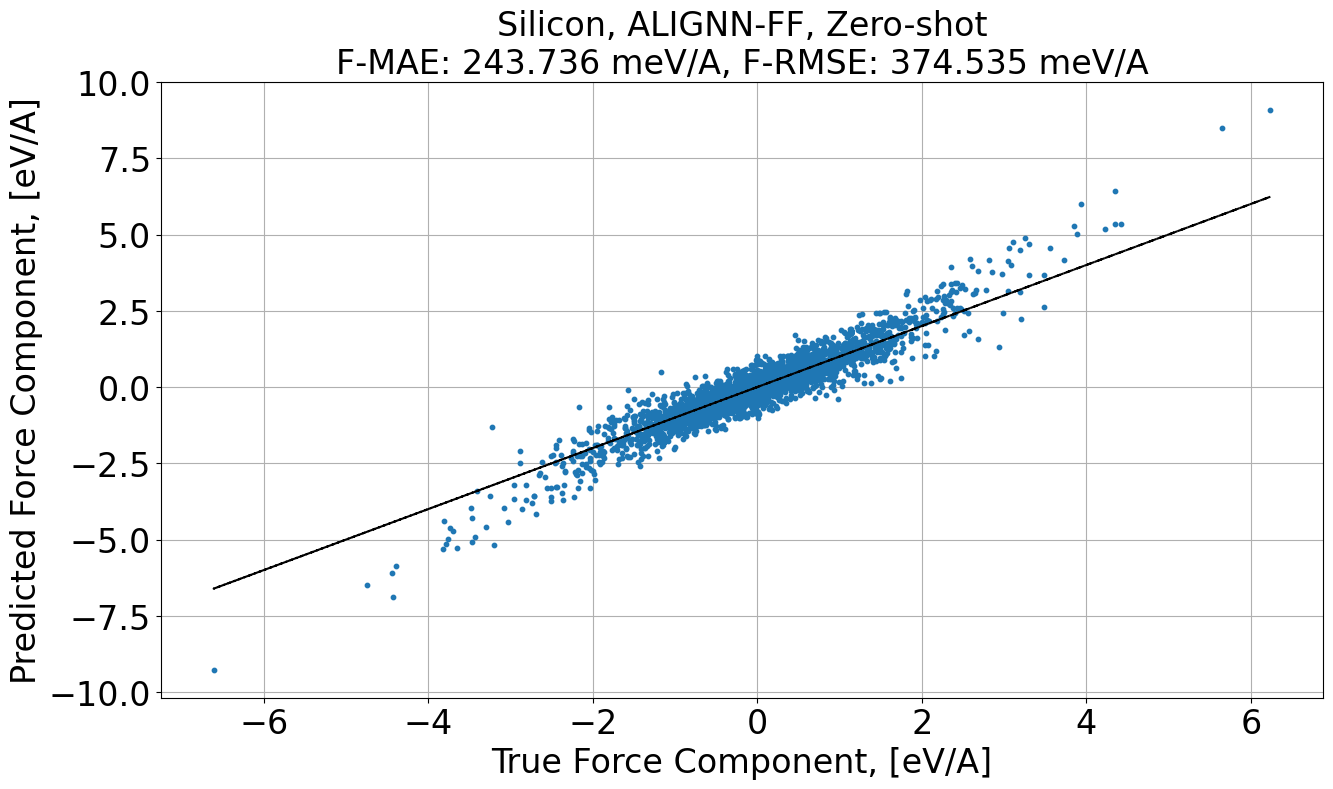

100%|██████████| 29/29 [00:09<00:00,  2.96it/s]


Material: Li, F-RMSE: 0.10352570443027344, F-MAE: 0.07265049999735192


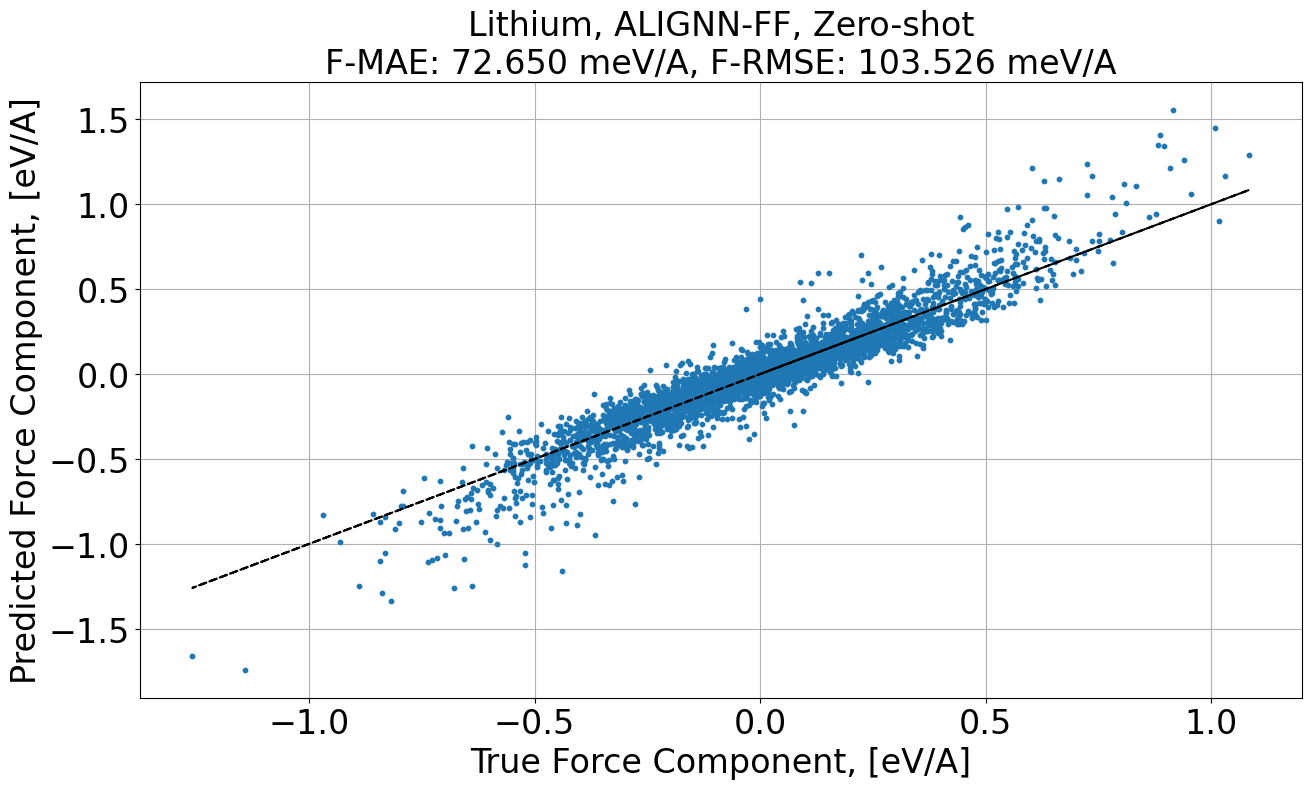

In [11]:
material_dict = {'Ni': 'Nickel', 'Cu': 'Copper', 'Mo': 'Molybdenum', 'Ge': 'Germanium', 'Si': 'Silicon', 'Li': 'Lithium'}
factor=25
for m in ['Ni', 'Cu', 'Mo', 'Ge', 'Si', 'Li']:
  f = open(f'{m}_test.json')
  test = json.load(f)

  e_true = []
  e_pred = []
  f_true = []
  f_pred = []
  n_atoms_all = []

  for ex in tqdm(test):
    s = Structure.from_dict(ex['structure'])
    atoms = aio.AseAtomsAdaptor.get_atoms(s)
    atoms.calc = calc
    e = atoms.get_potential_energy()
    f = factor*atoms.get_forces()

    e_true.append(ex['outputs']['energy'])
    e_pred.append(e)

    t = np.array(ex['outputs']['forces'])

    f_true.append(t)
    f_pred.append(f)

  f_true_ = np.concatenate(f_true).flatten()
  f_pred_ = np.concatenate(f_pred).flatten()
  print(f'Material: {m}, F-RMSE: {np.sqrt(np.mean(np.power(f_true_ - f_pred_, 2)))}, F-MAE: {np.mean(np.abs(f_true_ - f_pred_))}')

  plt.figure(figsize=(15, 8))
  matplotlib.pyplot.grid(True, which="both")
  plt.scatter(f_true_, f_pred_, s=10)
  plt.plot(f_true_, f_true_, 'k--')
  _ = plt.xlabel('True Force Component, [eV/A]', fontsize=24)
  _ = plt.ylabel('Predicted Force Component, [eV/A]', fontsize=24)
  plt.title(f'{material_dict[m]}, ALIGNN-FF, Zero-shot\nF-MAE: {1000 * np.mean(np.abs(f_true_ - f_pred_)):.3f} meV/A, F-RMSE: {1000 * np.sqrt(np.mean(np.power(f_true_ - f_pred_, 2))):.3f} meV/A', fontsize=24)
  plt.show()

#Trained on mlearn data only (model: `mlearn_path`)

dir_path /usr/local/lib/python3.10/dist-packages/alignn/ff/fmult_mlearn_only


100%|██████████| 13.8M/13.8M [00:02<00:00, 5.72MiB/s]


model_path /usr/local/lib/python3.10/dist-packages/alignn/ff/fmult_mlearn_only


100%|██████████| 31/31 [00:17<00:00,  1.77it/s]


Material: Ni, F-RMSE: 0.08865563493491417, F-MAE: 0.045766160497073556


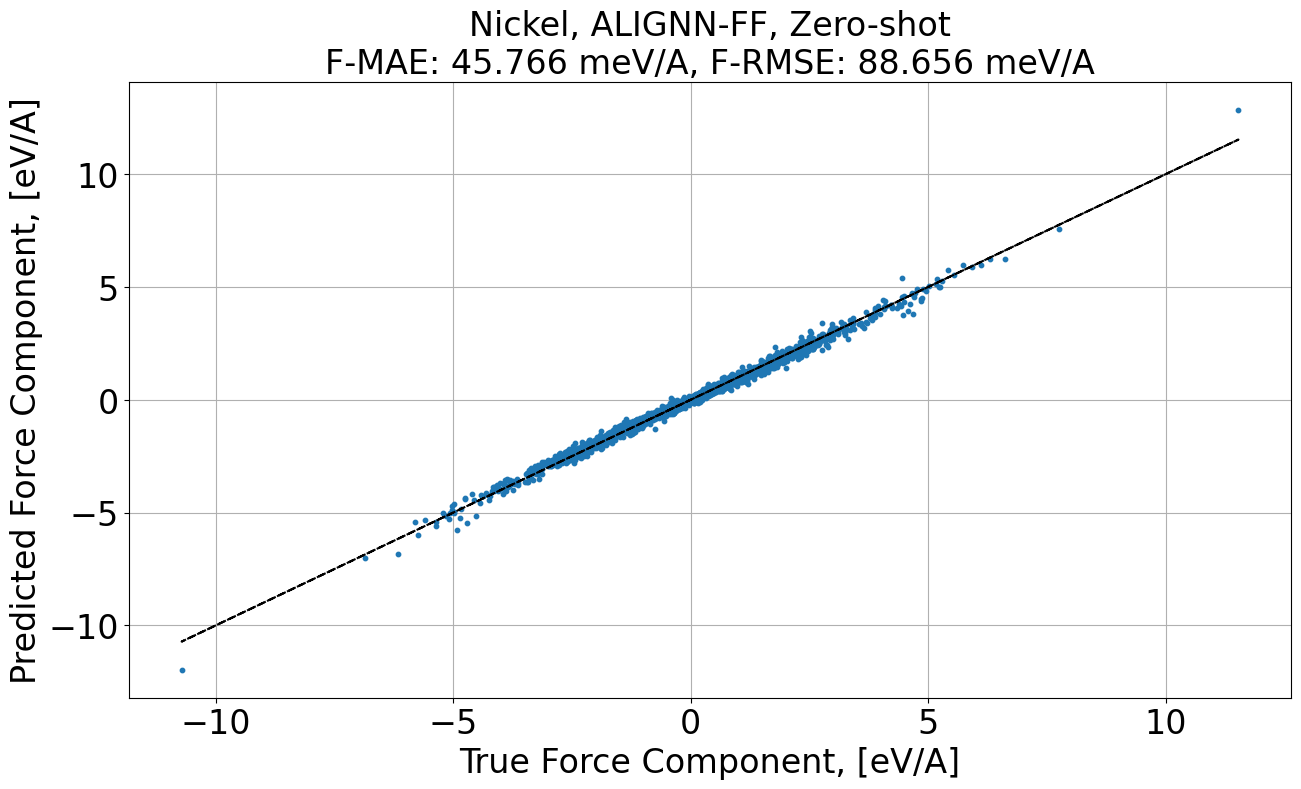

100%|██████████| 31/31 [00:19<00:00,  1.62it/s]


Material: Cu, F-RMSE: 0.06865679535443392, F-MAE: 0.0358859993077852


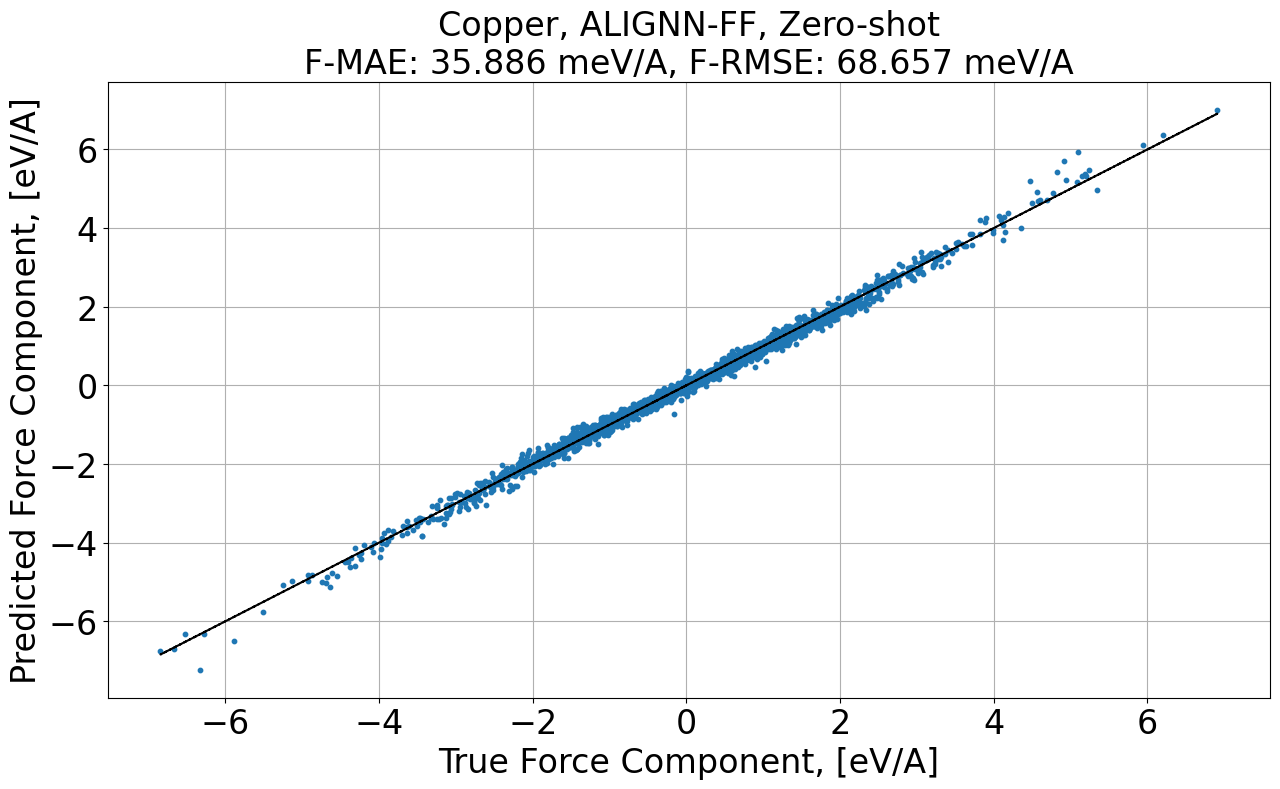

100%|██████████| 23/23 [00:08<00:00,  2.57it/s]


Material: Mo, F-RMSE: 0.21671685819875933, F-MAE: 0.12489655134001967


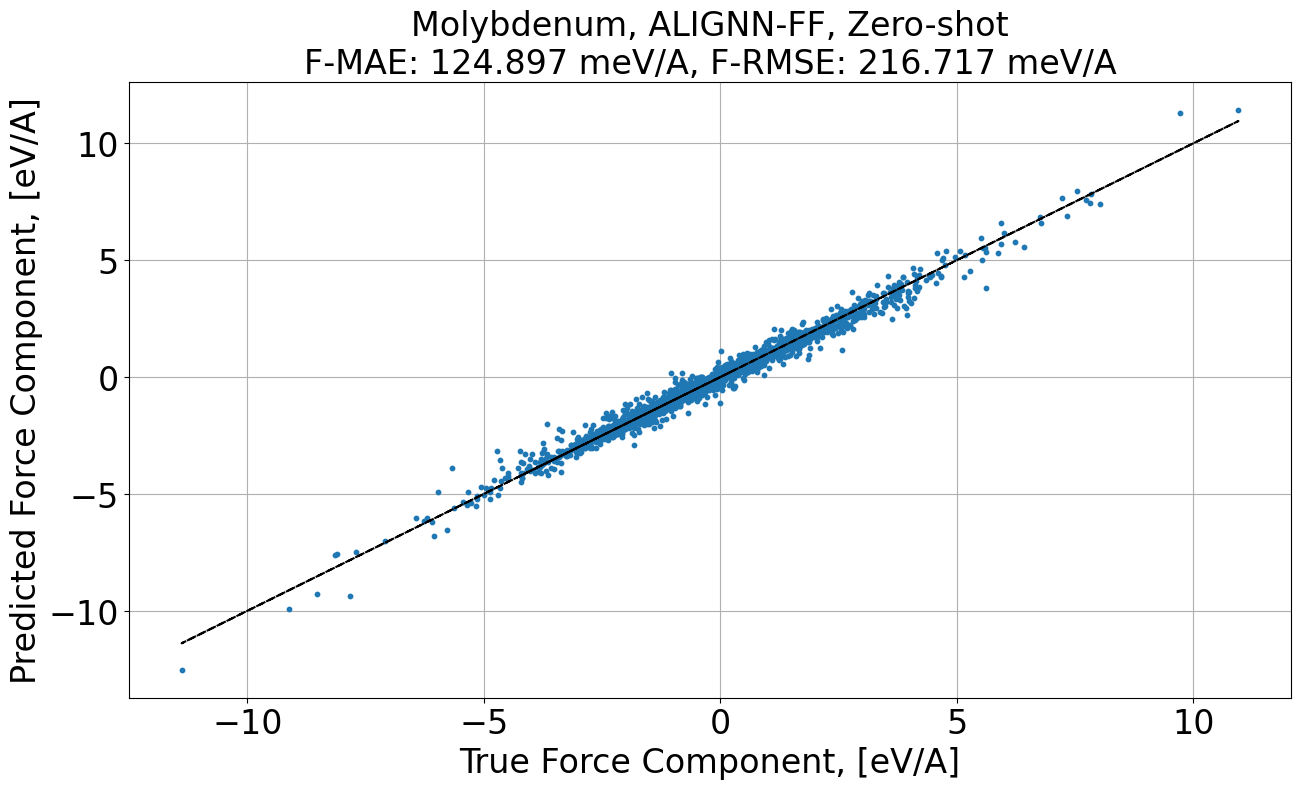

100%|██████████| 25/25 [00:08<00:00,  3.02it/s]


Material: Ge, F-RMSE: 0.11127719380730057, F-MAE: 0.07249799634305518


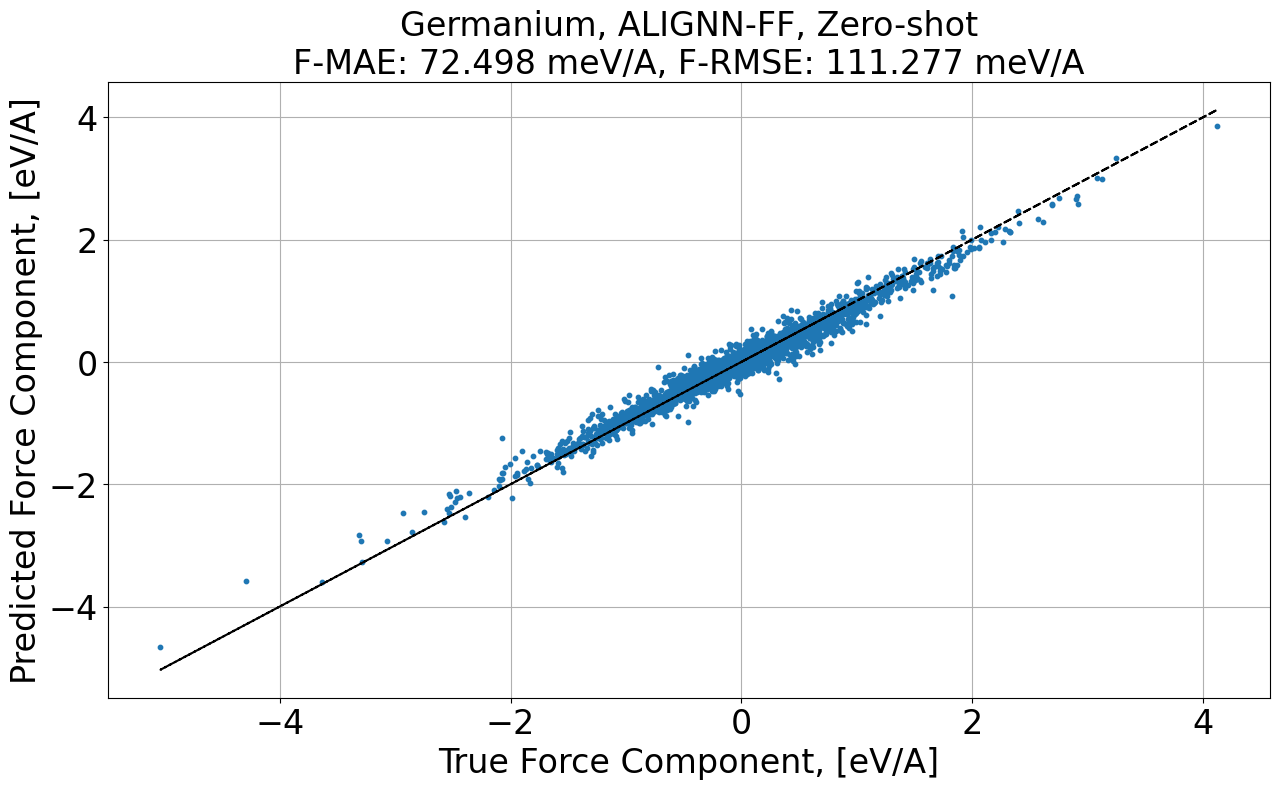

100%|██████████| 25/25 [00:09<00:00,  2.53it/s]


Material: Si, F-RMSE: 0.13902738272207985, F-MAE: 0.09012117573976726


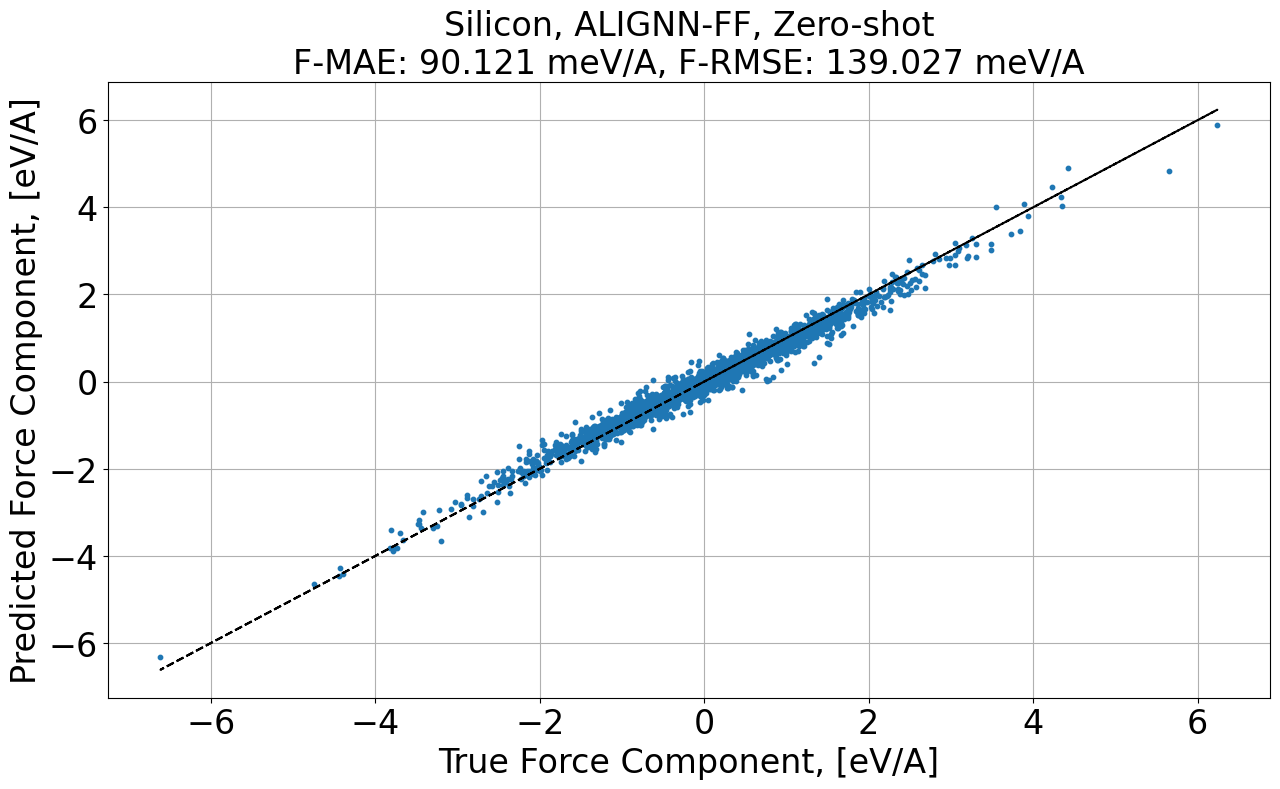

100%|██████████| 29/29 [00:13<00:00,  2.19it/s]


Material: Li, F-RMSE: 0.05295693711925606, F-MAE: 0.038954559832175786


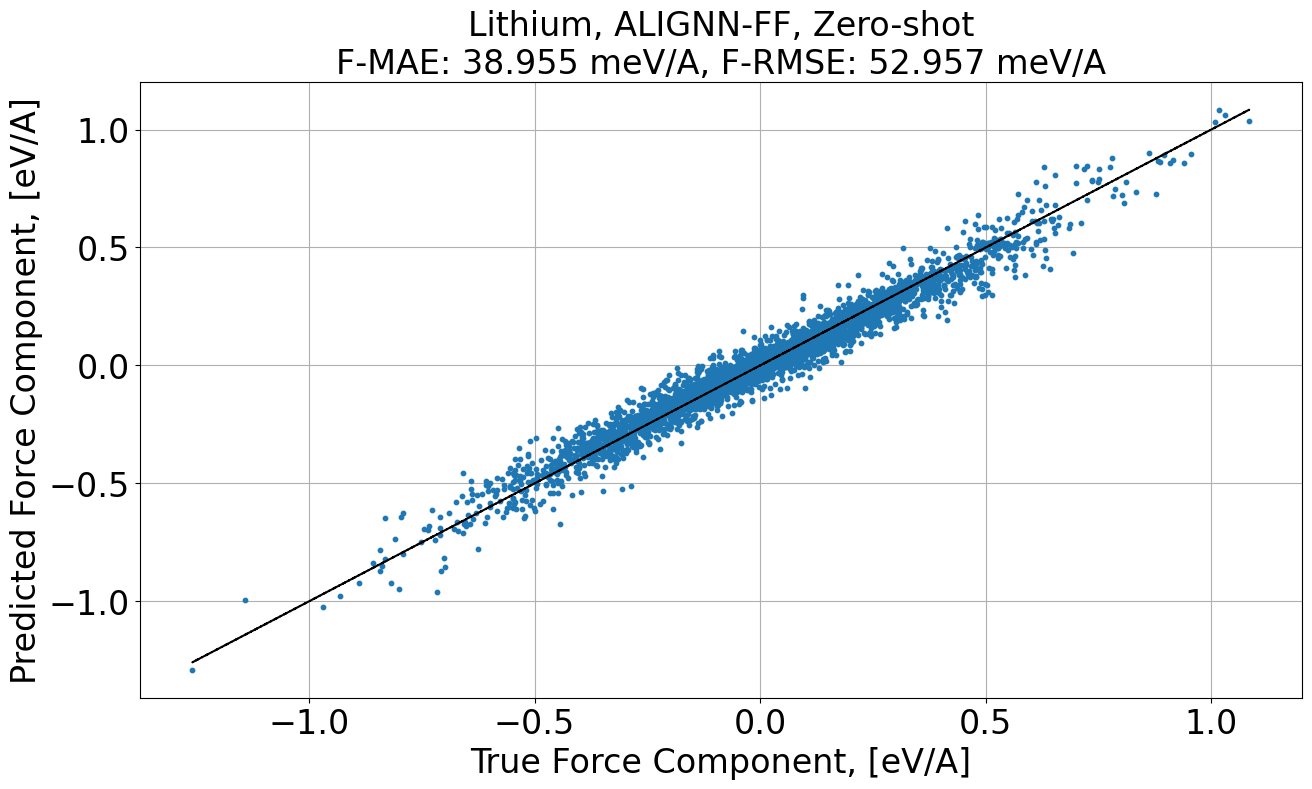

In [12]:
from alignn.ff.ff import AlignnAtomwiseCalculator,default_path,fd_path,alignnff_fmult,mlearn_path
model_path = mlearn_path() #default_path()
calc = AlignnAtomwiseCalculator(path=model_path)
material_dict = {'Ni': 'Nickel', 'Cu': 'Copper', 'Mo': 'Molybdenum', 'Ge': 'Germanium', 'Si': 'Silicon', 'Li': 'Lithium'}
factor=1
for m in ['Ni', 'Cu', 'Mo', 'Ge', 'Si', 'Li']:
  f = open(f'{m}_test.json')
  test = json.load(f)

  e_true = []
  e_pred = []
  f_true = []
  f_pred = []
  n_atoms_all = []

  for ex in tqdm(test):
    s = Structure.from_dict(ex['structure'])
    atoms = aio.AseAtomsAdaptor.get_atoms(s)
    atoms.calc = calc
    e = atoms.get_potential_energy()
    f = factor*atoms.get_forces()

    e_true.append(ex['outputs']['energy'])
    e_pred.append(e)

    t = np.array(ex['outputs']['forces'])

    f_true.append(t)
    f_pred.append(f)

  f_true_ = np.concatenate(f_true).flatten()
  f_pred_ = np.concatenate(f_pred).flatten()
  print(f'Material: {m}, F-RMSE: {np.sqrt(np.mean(np.power(f_true_ - f_pred_, 2)))}, F-MAE: {np.mean(np.abs(f_true_ - f_pred_))}')

  plt.figure(figsize=(15, 8))
  matplotlib.pyplot.grid(True, which="both")
  plt.scatter(f_true_, f_pred_, s=10)
  plt.plot(f_true_, f_true_, 'k--')
  _ = plt.xlabel('True Force Component, [eV/A]', fontsize=24)
  _ = plt.ylabel('Predicted Force Component, [eV/A]', fontsize=24)
  plt.title(f'{material_dict[m]}, ALIGNN-FF, Zero-shot\nF-MAE: {1000 * np.mean(np.abs(f_true_ - f_pred_)):.3f} meV/A, F-RMSE: {1000 * np.sqrt(np.mean(np.power(f_true_ - f_pred_, 2))):.3f} meV/A', fontsize=24)
  plt.show()